In [18]:
%load_ext autoreload
%autoreload 2

from functions import *
from tqdm import *

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, balanced_accuracy_score, log_loss, accuracy_score
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.svm import SVC
from xgboost import XGBRegressor, plot_importance, XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import wilcoxon

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

from collections import defaultdict

import true_preprocessing
import cross_validations

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Preprocessing

In [8]:
X_0 = pd.concat([pd.DataFrame(true_preprocessing.X),true_preprocessing.meta_data['sugary_sweets_frequency']],axis=1)
X_1 = remove_rows_where_column_nan(X_0,'sugary_sweets_frequency')
X_2 = remove_rows_where_column_specified(X_1,'sugary_sweets_frequency','Unspecified','sugary_sweets_frequency','other','sugary_sweets_frequency','unknown')
X_2.loc[:,'sugary_sweets_frequency'].unique()

array(['Regularly (3-5 times/week)', 'Occasionally (1-2 times/week)',
       'Rarely (less than once/week)', 'Daily', 'Never'], dtype=object)

In [9]:
X_2.loc[:,'sugary_sweets_frequency'].value_counts()

Occasionally (1-2 times/week)    1067
Rarely (less than once/week)      861
Regularly (3-5 times/week)        852
Daily                             600
Never                             532
Name: sugary_sweets_frequency, dtype: int64

<Axes: title={'center': 'Sugary sweets frequency'}>

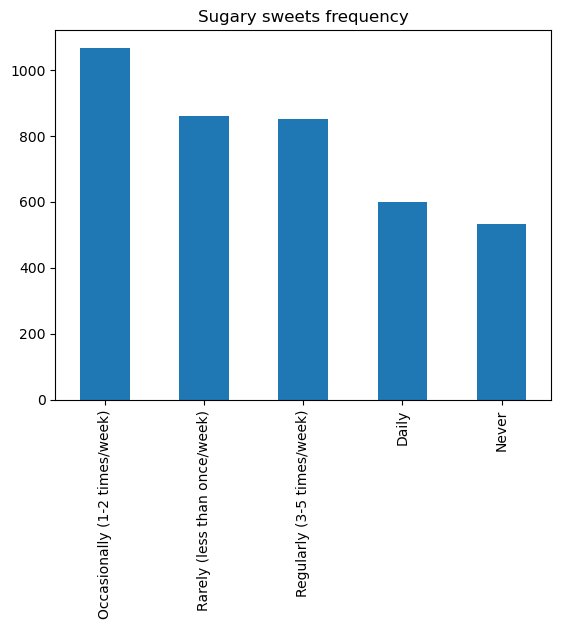

In [16]:
X_2.loc[:,'sugary_sweets_frequency'].value_counts().plot(kind='bar', title='Sugary sweets frequency')

In [11]:
X = X_2.iloc[:,:-1]; y = X_2.iloc[:,-1]

# CV

In [12]:
svm_scores, svm_params = cross_validations.SVM_CV(X.iloc[:,1:],y)
logistic_scores, logistic_params = cross_validations.logistic_CV(X.iloc[:,1:],y)
rf_scores, rf_params = cross_validations.rf_CV(X.iloc[:,1:],y)
XGB_scores, XGB_params = cross_validations.XGB_CV(X.iloc[:,1:],y)
dummy_scores = cross_validations.dummy_CV(X.iloc[:,1:],y)

>acc=0.296, est=0.303, cfg={'C': 100, 'gamma': 0.001}
>acc=0.346, est=0.302, cfg={'C': 10, 'gamma': 0.001}
>acc=0.294, est=0.298, cfg={'C': 10, 'gamma': 0.001}
>acc=0.270, est=0.300, cfg={'C': 10, 'gamma': 0.001}
>acc=0.320, est=0.306, cfg={'C': 10, 'gamma': 0.001}
>acc=0.322, est=0.304, cfg={'C': 100, 'gamma': 0.001}
>acc=0.281, est=0.308, cfg={'C': 10, 'gamma': 0.001}


c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenv

>acc=0.274, est=0.292, cfg={'C': 1.0, 'penalty': 'l1'}


c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenv

>acc=0.321, est=0.283, cfg={'C': 1.0, 'penalty': 'l2'}


c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenv

>acc=0.275, est=0.289, cfg={'C': 1.0, 'penalty': 'l1'}


c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenv

>acc=0.289, est=0.292, cfg={'C': 0.1, 'penalty': 'l2'}


c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenv

>acc=0.312, est=0.295, cfg={'C': 1.0, 'penalty': 'l1'}


c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenv

>acc=0.289, est=0.294, cfg={'C': 0.01, 'penalty': 'l2'}


c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\malth\anaconda3\envs\myenv

>acc=0.276, est=0.292, cfg={'C': 0.01, 'penalty': 'l2'}
>acc=0.301, est=0.277, cfg={'max_features': 0.9, 'n_estimators': 1000}
>acc=0.267, est=0.273, cfg={'max_features': 0.475, 'n_estimators': 50}
>acc=0.297, est=0.265, cfg={'max_features': 0.9, 'n_estimators': 525}
>acc=0.280, est=0.275, cfg={'max_features': 0.475, 'n_estimators': 1000}
>acc=0.267, est=0.272, cfg={'max_features': 0.9, 'n_estimators': 50}
>acc=0.286, est=0.279, cfg={'max_features': 0.475, 'n_estimators': 1000}
>acc=0.249, est=0.289, cfg={'max_features': 0.9, 'n_estimators': 1000}
>acc=0.256, est=0.270, cfg={'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 1000}
>acc=0.288, est=0.277, cfg={'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 500}
>acc=0.267, est=0.272, cfg={'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 1000}
>acc=0.241, est=0.282, cfg={'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 1000}
>acc=0.284, est=0.271, cfg={'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}
>acc=0.

# Evaluation plots

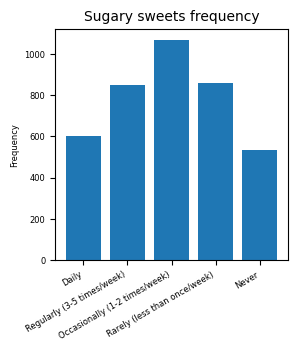

In [31]:
plot_distribution(list(y), ['Daily', 'Regularly (3-5 times/week)','Occasionally (1-2 times/week)',
       'Rarely (less than once/week)', 'Never'], 'Sugary sweets frequency', 3, 3)

Text(0.5, 0, 'Method')

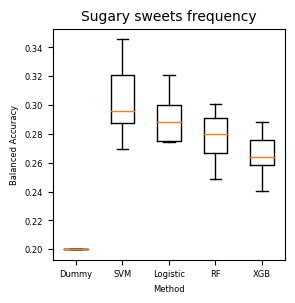

In [30]:
plt.figure(figsize=(3,3))
plt.boxplot([dummy_scores, np.ravel(svm_scores), logistic_scores, rf_scores, XGB_scores], labels=['Dummy', 'SVM', 'Logistic', 'RF', 'XGB'])
plt.title('Sugary sweets frequency')
plt.ylabel('Balanced Accuracy')
plt.xlabel('Method')

# Wilcoxon Signed-Rank test

In [43]:
# Calculates p-value
#Remember to change alternative, if we can't expect the model to perform greater
print('SVM statistic=%.0f and p-value=%.4f' % (wilcoxon(svm_scores,dummy_scores, alternative='greater')))
print('Logistic statistic=%.0f and p-value=%.4f' % (wilcoxon(logistic_scores,dummy_scores, alternative='greater')))
print('rf statistic=%.0f and p-value=%.4f' % (wilcoxon(rf_scores,dummy_scores, alternative='greater')))
print('XGB statistic=%.0f and p-value=%.4f' % (wilcoxon(XGB_scores,dummy_scores, alternative='greater')))

SVM statistic=28 and p-value=0.0078
Logistic statistic=28 and p-value=0.0078
rf statistic=28 and p-value=0.0078
XGB statistic=28 and p-value=0.0078


In [44]:
# Store scores for intermodel comparison across all 5 targets
sugary_sweets_frequency_svm = svm_scores; sugary_sweets_frequency_log = logistic_scores; sugary_sweets_frequency_rf = rf_scores; sugary_sweets_frequency_XGB = XGB_scores; 
%store sugary_sweets_frequency_svm
%store sugary_sweets_frequency_log
%store sugary_sweets_frequency_rf
%store sugary_sweets_frequency_XGB

Stored 'sugary_sweets_frequency_svm' (list)
Stored 'sugary_sweets_frequency_log' (list)
Stored 'sugary_sweets_frequency_rf' (list)
Stored 'sugary_sweets_frequency_XGB' (list)


# Feature importance

## Calculation

In [33]:
svm_best_params = svm_params[np.array(svm_scores).argmax()]
logistic_best_params = logistic_params[np.array(logistic_scores).argmax()]
rf_best_params = rf_params[np.array(rf_scores).argmax()]
XGB_best_params = XGB_params[np.array(XGB_scores).argmax()]

In [34]:
features_SVM, yhat_SVM = SVM_features(X.iloc[:,1:],y,C=svm_best_params['C'], gamma=svm_best_params['gamma'])
acc_SVM = balanced_accuracy_score(y, yhat_SVM)

In [35]:
features_logistic, yhat_logistic = logistic_features(X.iloc[:,1:],y,C=logistic_best_params['C'], penalty=logistic_best_params['penalty'])
acc_log = balanced_accuracy_score(y, yhat_logistic)

In [36]:
features_rf, yhat_rf = rf_features(X.iloc[:,1:],y,n_estimators=rf_best_params['n_estimators'], max_features=rf_best_params['max_features'])
acc_rf = balanced_accuracy_score(y, yhat_rf)

In [37]:
features_XGB, yhat_XGB = XGB_features(X.iloc[:,1:],y,learning_rate=XGB_best_params['learning_rate'], 
                       max_depth=XGB_best_params['max_depth'], n_estimators=XGB_best_params['n_estimators'])
acc_XGB = balanced_accuracy_score(y, yhat_XGB)

c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective, use_label_encoder` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\malth\anaconda3\envs\myenvyaml\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


## Visualisations

In [38]:
feature_importances_dict = {
    'SVM': features_SVM['Importance'],
    'Logistic Regression': features_logistic['Importance'],
    'RF': features_rf['Importance'],
    'XGBoost': features_XGB['Importance'],
}
feature_names = list(X.columns)[1:]
top_k = 10

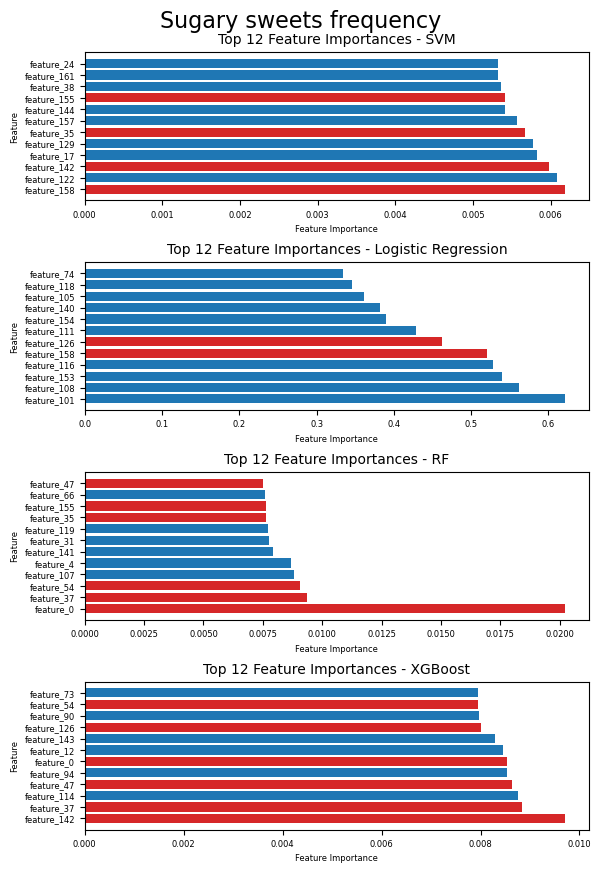

In [42]:
plot_top_features_subplot(feature_importances_dict, rename_columns(feature_names, list_bool=True), 12, 'Sugary sweets frequency')

# Old

In [1]:
%load_ext autoreload
%autoreload 2

from functions import *

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, accuracy_score, log_loss
from sklearn.dummy import DummyRegressor, DummyClassifier
from xgboost import XGBRegressor, plot_importance, XGBClassifier
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

from collections import defaultdict

import true_preprocessing

In [7]:
X_0 = pd.concat([pd.DataFrame(true_preprocessing.X),true_preprocessing.meta_data['sugary_sweets_frequency']],axis=1)
X_1 = remove_rows_where_column_nan(X_0,'sugary_sweets_frequency')
X_2 = remove_rows_where_column_specified(X_1,'sugary_sweets_frequency','Unspecified','sugary_sweets_frequency','other','sugary_sweets_frequency','unknown')
X_2.loc[:,'sugary_sweets_frequency'].unique()

array(['Regularly (3-5 times/week)', 'Occasionally (1-2 times/week)',
       'Rarely (less than once/week)', 'Daily', 'Never'], dtype=object)

<Axes: >

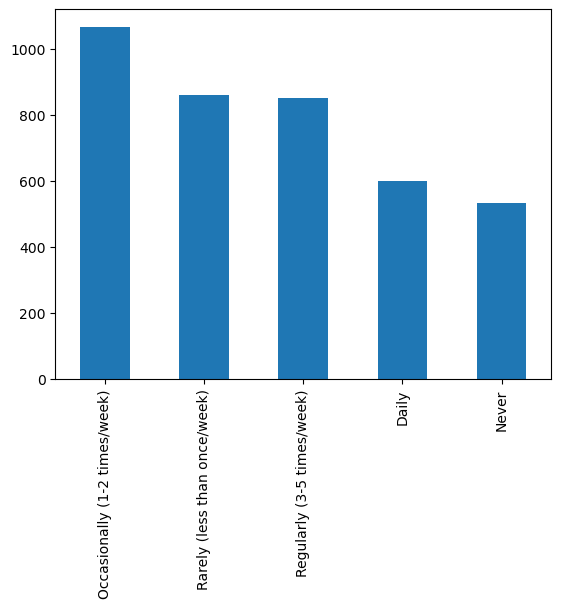

In [8]:
X_2.loc[:,'sugary_sweets_frequency'].value_counts().plot(kind='bar')

In [9]:
X = X_2.iloc[:,:-1]; y = X_2.iloc[:,-1]
scorer = make_scorer(accuracy_score)

In [10]:
from sklearn.model_selection import StratifiedKFold

ref_scores = []
for i in range(10):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    dummy = DummyClassifier(strategy="prior")
    ref_scores.append(np.mean(cross_val_score(dummy, X, y, scoring=scorer, cv=kf)))
    #print("Reference score: {}".format(np.mean(ref_scores)))

In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_scores = []
for i in range(10):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    svm_model = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', C=1.0))
    svm_scores.append(np.mean(cross_val_score(svm_model, X, y, scoring=scorer, cv=kf, n_jobs=-1)))
    #print("SVM score: {}".format(np.mean(svm_scores)))
    print(i)

0
1
2
3
4
5
6
7
8
9


In [12]:
from sklearn.linear_model import LogisticRegression 

logit_scores = []
for i in range(10):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    logit_model = LogisticRegression(penalty = 'l1', solver='liblinear',  multi_class='auto')
    logit_scores.append(np.mean(cross_val_score(logit_model, X, y, scoring=scorer, cv=kf, n_jobs=2)))
    #print("Linear Regression with L1 score: {}".format(np.mean(lasso_scores)))
    print(i)

0
1
2
3
4
5
6
7
8
9


In [13]:
# random forest performance
rf_scores = []
for i in range(10):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    rf_model = RandomForestClassifier(500)
    rf_scores.append(np.mean(cross_val_score(rf_model, X, y, scoring=scorer, cv=kf, n_jobs=-1)))
    #print("Random forest score: {}".format(np.mean(rf_scores)))
    print(i)

0
1
2
3
4
5
6
7
8
9


In [14]:
# XGBoost performance
le = LabelEncoder()
y_XGB = le.fit_transform(y)

XGB_scores = []
for i in range(10):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    XGB_model = XGBClassifier(colsample_bytree=0.02,learning_rate=0.1, max_depth=8, 
                        reg_lambda=1, n_estimators=500, objective='multi:softmax')
    XGB_scores.append(np.mean(cross_val_score(XGB_model, X, y_XGB, scoring=scorer, cv=kf, n_jobs=-1)))
    #print("XGBoost Regressor score: {}".format(np.mean(XGB_scores)))
    print(i)

0
1
2
3
4
5
6
7
8
9


Text(0, 0.5, 'accuracy')

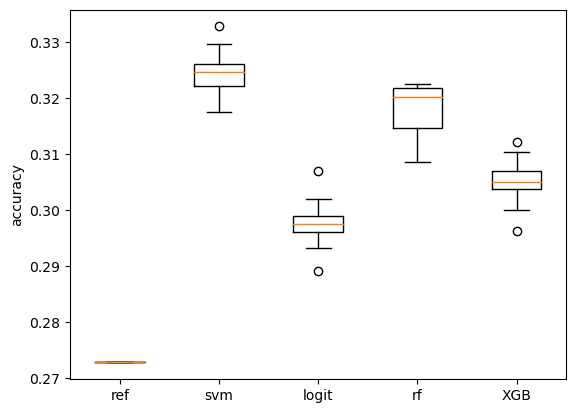

In [15]:
plt.boxplot([ref_scores, svm_scores, logit_scores, rf_scores, XGB_scores], labels=['ref', 'svm', 'logit', 'rf', 'XGB'])
#plt.ylim(14,16.5)
plt.ylabel('accuracy')
#plt.gca().invert_yaxis()